# 正則化

正則化を実装することで、過学習がどのように防げるのか検証  
2次元空間内のデータの回帰を想定

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 1. データ作成
 
$g(x)=x^3 + x^2 + x$ を描画

In [5]:
def g(x):
    return 0.1*(x**3+x**2+x)

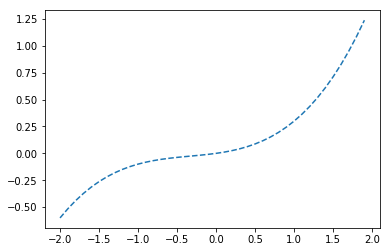

In [6]:
x=np.arange(-2,2,0.1)
plt.plot(x,g(x), linestyle="dashed")
plt.show()

### 説明変数作成

In [14]:
train_x=np.arange(-2,2,0.5)
train_x

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

### 目的変数作成

In [16]:
# データにノイズ付加
np.random.seed(0)
train_y=g(train_x)+np.random.randn(len(train_x))*0.05
train_y

array([-0.51179738, -0.24249214, -0.0510631 ,  0.07454466,  0.0933779 ,
        0.03863611,  0.34750442,  0.70493214])

### データをプロット

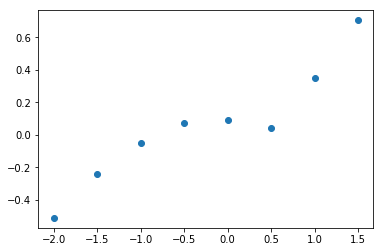

In [25]:
x=np.arange(-2,2,0.1)
#plt.plot(x,g(x), linestyle="dashed")
plt.plot(train_x,train_y,"o")
plt.show()

In [21]:
# 標準化（平均０、標準偏差１）
# def standardize(x):
#     return (x-train_x.mean())/train_x.std()

In [22]:
# train_str_x=standardize(train_x)

In [23]:
# x=np.arange(-2,2,0.1)
# plt.plot(x,g(x), linestyle="dashed")
# plt.plot(train_str_x,train_y,"o")
# plt.show()

In [24]:
# train_str_x

In [305]:
# 7次多項式での学習
# 学習データの行列
def to_matrix(x):
    return np.vstack((np.ones(x.shape[0]), x, x**2, x**3, x**4, x**5, x**6, x**7)).T

In [306]:
X=to_matrix(train_str_x)

In [307]:
# パラメーター初期化
np.random.seed(0)
theta=np.random.randn(X.shape[1])
print("theta：",theta)

theta： [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721]


In [308]:
# 仮説関数
def f(x):
    return np.dot(x, theta)

In [309]:
# 平均２乗誤差
def mse(x,y):
    return (1/x.shape[0])*np.sum((y-f(x))**2)

In [310]:
# 学習率
alpha=0.001
# 反復回数
iteration=1000

In [334]:
# パラメーター初期化
np.random.seed(1)
theta=np.random.randn(X.shape[1])

loss_list=[]

for i in range(iteration):
    theta=theta-alpha*np.dot(f(X)-train_y,X)
    loss=mse(X,train_y)
    loss_list.append(mse(X,train_y))
    
    log="{}回目 ： loss={:.3f}"
    print(log.format(i+1,loss))


1回目 ： loss=72.385
2回目 ： loss=26.880
3回目 ： loss=11.405
4回目 ： loss=5.933
5回目 ： loss=3.986
6回目 ： loss=3.281
7回目 ： loss=3.015
8回目 ： loss=2.903
9回目 ： loss=2.847
10回目 ： loss=2.809
11回目 ： loss=2.779
12回目 ： loss=2.752
13回目 ： loss=2.726
14回目 ： loss=2.700
15回目 ： loss=2.675
16回目 ： loss=2.650
17回目 ： loss=2.625
18回目 ： loss=2.600
19回目 ： loss=2.576
20回目 ： loss=2.552
21回目 ： loss=2.529
22回目 ： loss=2.505
23回目 ： loss=2.482
24回目 ： loss=2.459
25回目 ： loss=2.437
26回目 ： loss=2.414
27回目 ： loss=2.392
28回目 ： loss=2.370
29回目 ： loss=2.348
30回目 ： loss=2.327
31回目 ： loss=2.306
32回目 ： loss=2.285
33回目 ： loss=2.264
34回目 ： loss=2.244
35回目 ： loss=2.223
36回目 ： loss=2.203
37回目 ： loss=2.183
38回目 ： loss=2.164
39回目 ： loss=2.144
40回目 ： loss=2.125
41回目 ： loss=2.106
42回目 ： loss=2.087
43回目 ： loss=2.069
44回目 ： loss=2.050
45回目 ： loss=2.032
46回目 ： loss=2.014
47回目 ： loss=1.996
48回目 ： loss=1.979
49回目 ： loss=1.961
50回目 ： loss=1.944
51回目 ： loss=1.927
52回目 ： loss=1.910
53回目 ： loss=1.893
54回目 ： loss=1.877
55回目 ： loss=1.861
56回目 ： loss=1.84

729回目 ： loss=0.219
730回目 ： loss=0.219
731回目 ： loss=0.219
732回目 ： loss=0.219
733回目 ： loss=0.219
734回目 ： loss=0.219
735回目 ： loss=0.218
736回目 ： loss=0.218
737回目 ： loss=0.218
738回目 ： loss=0.218
739回目 ： loss=0.218
740回目 ： loss=0.217
741回目 ： loss=0.217
742回目 ： loss=0.217
743回目 ： loss=0.217
744回目 ： loss=0.217
745回目 ： loss=0.217
746回目 ： loss=0.216
747回目 ： loss=0.216
748回目 ： loss=0.216
749回目 ： loss=0.216
750回目 ： loss=0.216
751回目 ： loss=0.216
752回目 ： loss=0.215
753回目 ： loss=0.215
754回目 ： loss=0.215
755回目 ： loss=0.215
756回目 ： loss=0.215
757回目 ： loss=0.215
758回目 ： loss=0.214
759回目 ： loss=0.214
760回目 ： loss=0.214
761回目 ： loss=0.214
762回目 ： loss=0.214
763回目 ： loss=0.214
764回目 ： loss=0.213
765回目 ： loss=0.213
766回目 ： loss=0.213
767回目 ： loss=0.213
768回目 ： loss=0.213
769回目 ： loss=0.213
770回目 ： loss=0.212
771回目 ： loss=0.212
772回目 ： loss=0.212
773回目 ： loss=0.212
774回目 ： loss=0.212
775回目 ： loss=0.212
776回目 ： loss=0.211
777回目 ： loss=0.211
778回目 ： loss=0.211
779回目 ： loss=0.211
780回目 ： loss=0.211
781回目 ： loss

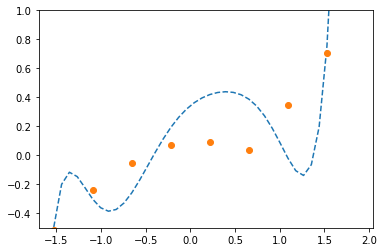

In [335]:
x=np.arange(-2,2,0.1)
str_x=standardize(x)
#plt.plot(x,g(x), linestyle="dashed")
plt.plot(str_x,f(to_matrix(str_x)), linestyle="dashed")
plt.plot(train_str_x,train_y,"o")
plt.ylim(-0.5,1)
plt.show()

# 正則化項

In [336]:
#  正則化定数
lam=1

# パラメーター初期化
np.random.seed(1)
theta=np.random.randn(X.shape[1])

# 平均２乗誤差（正則化項つき）
def mse(x,y):
    return (1/x.shape[0])*(np.sum((y-f(x))**2)+0.5*lam*np.sum(theta**2))

# 学習率
alpha=0.001
# 反復回数
iteration=1000





loss_list=[]

for i in range(iteration):
    #正則化項（バイアス項は正則化しないので0）
    reg_term=lam*np.hstack([0, theta[1:]])
    theta=theta-(alpha*np.dot(f(X)-train_y,X)+reg_term)
    loss=mse(X,train_y)
    loss_list.append(mse(X,train_y))
    
    log="{}回目 ： loss={:.3f}"
    print(log.format(i+1,loss))


1回目 ： loss=359.814
2回目 ： loss=313.765
3回目 ： loss=257.370
4回目 ： loss=235.562
5回目 ： loss=196.395
6回目 ： loss=180.455
7回目 ： loss=149.920
8回目 ： loss=138.609
9回目 ： loss=114.423
10回目 ： loss=106.628
11回目 ： loss=87.356
12回目 ： loss=82.156
13回目 ： loss=66.729
14回目 ： loss=63.417
15回目 ： loss=51.015
16回目 ： loss=49.061
17回目 ： loss=39.046
18回目 ： loss=38.056
19回目 ： loss=29.932
20回目 ： loss=29.614
21回目 ： loss=22.994
22回目 ： loss=23.133
23回目 ： loss=17.713
24回目 ： loss=18.152
25回目 ： loss=13.694
26回目 ： loss=14.320
27回目 ： loss=10.636
28回目 ： loss=11.368
29回目 ： loss=8.310
30回目 ： loss=9.090
31回目 ： loss=6.541
32回目 ： loss=7.329
33回目 ： loss=5.195
34回目 ： loss=5.964
35回目 ： loss=4.170
36回目 ： loss=4.904
37回目 ： loss=3.390
38回目 ： loss=4.078
39回目 ： loss=2.796
40回目 ： loss=3.432
41回目 ： loss=2.343
42回目 ： loss=2.925
43回目 ： loss=1.996
44回目 ： loss=2.525
45回目 ： loss=1.730
46回目 ： loss=2.207
47回目 ： loss=1.525
48回目 ： loss=1.953
49回目 ： loss=1.367
50回目 ： loss=1.749
51回目 ： loss=1.243
52回目 ： loss=1.583
53回目 ： loss=1.146
54回目 ： loss=1.447

748回目 ： loss=0.041
749回目 ： loss=0.041
750回目 ： loss=0.041
751回目 ： loss=0.041
752回目 ： loss=0.041
753回目 ： loss=0.041
754回目 ： loss=0.041
755回目 ： loss=0.041
756回目 ： loss=0.041
757回目 ： loss=0.041
758回目 ： loss=0.041
759回目 ： loss=0.041
760回目 ： loss=0.041
761回目 ： loss=0.041
762回目 ： loss=0.041
763回目 ： loss=0.041
764回目 ： loss=0.041
765回目 ： loss=0.041
766回目 ： loss=0.041
767回目 ： loss=0.041
768回目 ： loss=0.041
769回目 ： loss=0.041
770回目 ： loss=0.041
771回目 ： loss=0.041
772回目 ： loss=0.041
773回目 ： loss=0.041
774回目 ： loss=0.041
775回目 ： loss=0.041
776回目 ： loss=0.041
777回目 ： loss=0.041
778回目 ： loss=0.041
779回目 ： loss=0.041
780回目 ： loss=0.041
781回目 ： loss=0.041
782回目 ： loss=0.041
783回目 ： loss=0.041
784回目 ： loss=0.041
785回目 ： loss=0.041
786回目 ： loss=0.041
787回目 ： loss=0.041
788回目 ： loss=0.041
789回目 ： loss=0.041
790回目 ： loss=0.041
791回目 ： loss=0.041
792回目 ： loss=0.041
793回目 ： loss=0.041
794回目 ： loss=0.041
795回目 ： loss=0.041
796回目 ： loss=0.041
797回目 ： loss=0.041
798回目 ： loss=0.041
799回目 ： loss=0.041
800回目 ： loss

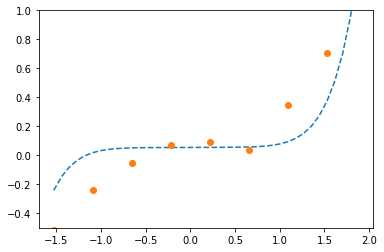

In [337]:
x=np.arange(-2,2,0.1)
str_x=standardize(x)
#plt.plot(x,g(x), linestyle="dashed")
plt.plot(str_x,f(to_matrix(str_x)), linestyle="dashed")
plt.plot(train_str_x,train_y,"o")
plt.ylim(-0.5,1)
plt.show()